# <font color='red'> Phase Diagram of a Harmonic Oscillator </font>

## 1. Using Arrays

### * The equation of motion for a harmonic oscillator is $\dot{x}=\frac{p}{m}$ and $\dot{p}=-m \omega^2 x$. Lets solve this with first order solver.

In [43]:
from matplotlib import pyplot as plt # We need this package to plot figures.

In [45]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt
    dp = -m*(ω**2)*x*δt
    return dx,dp

In [46]:
# TEST as you write...
dx,dp = Simple_Evolve_SHO(2,1,1e-4,1,1)
dx,dp

(0.0001, -0.0002)

### * Do not use for Loops unless you need to. Lets see this in action by first building a "loopy way" of evaluating all this.

In [48]:
def Evolve_Many_Times(x0,p0,δt,m,ω,num):
        x=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        p=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        x.append(x0) # Append function simply adds a given entry, x0 here, as the last entry to the list.
        p.append(p0) # APPEND IS A METHOD, which means that you use .append() method to do things. This should remind you of Object Oriented Programming...
        for i in range(1,num): # WHY did I write range(1,num) and not just range(num)?
            δx,δp = Simple_Evolve_SHO(x[-1],p[-1],δt,m,ω)
            x.append(x[-1]+δx)
            p.append(p[-1]+δp)
        return x,p

In [59]:
x0=.0
p0=.01
x,p=Evolve_Many_Times(x0,p0,1e-5,1,1,10**6)

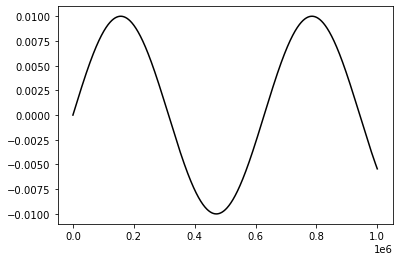

In [60]:
# Notice that this is a quick way to plot x,
# since I did not give the x-axis, plt plots x on the y-axis vs. array number on the x-axis.
plt.plot(x,'k')

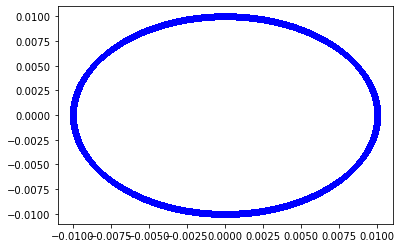

In [61]:
plt.plot(x,p,'b+')
#plt.axes().set_aspect('equal', 'datalim')

In [58]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

754 ns ± 129 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
9.19 µs ± 893 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
99 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.11 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.43 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
121 ms ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


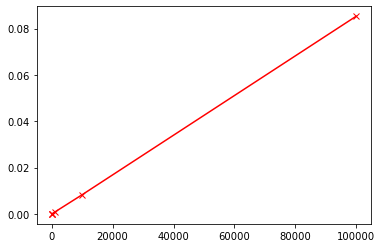

In [63]:
#IF you plot it, there is a bunch of points at the origin...
plt.plot([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rx-')

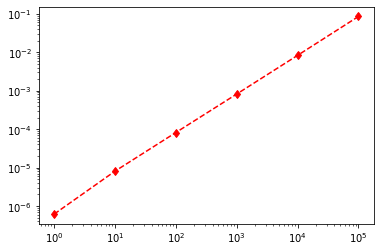

In [64]:
# Use semilogy or loglog to visualize this better
plt.loglog([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rd--')

## We learnt from the basic numpy notebook that numpy typically is better at this stuff. So lets see if we can make things better?

# 3. Using Integrators 
#### (see https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html)

In [65]:
import numpy as np

# In integrators , typically you are trying to solve a 1st order vector ODE of the form $\dot{\vec{y}}=f(\vec{y})$. You need to define the RHS.

In [71]:
def deriv(u, t, omega_squared):
    "Provides derivative of vector u."
    xdot, x = u
    return [-omega_squared * x, xdot]

In [75]:
from scipy.integrate import odeint
y0 = [0, 1]
snapshot_dt = 0.3
ts = np.arange(0, 12, snapshot_dt)
scipysol = odeint(deriv, y0, ts, args=(1,))

In [76]:
odeint?

In [77]:
scipysol

array([[ 0.        ,  1.        ],
       [-0.29552019,  0.95533649],
       [-0.56464245,  0.82533562],
       [-0.78332689,  0.62160999],
       [-0.93203906,  0.36235779],
       [-0.99749497,  0.07073726],
       [-0.97384763, -0.22720201],
       [-0.8632094 , -0.504846  ],
       [-0.67546325, -0.73739361],
       [-0.42737999, -0.90407206],
       [-0.14112013, -0.98999246],
       [ 0.15774557, -0.98747978],
       [ 0.44252033, -0.89675847],
       [ 0.68776606, -0.72593239],
       [ 0.87157571, -0.49026094],
       [ 0.9775301 , -0.21079593],
       [ 0.99616464,  0.08749885],
       [ 0.92581475,  0.37797762],
       [ 0.7727646 ,  0.63469278],
       [ 0.55068568,  0.83471273],
       [ 0.27941565,  0.96017028],
       [-0.01681375,  0.99985869],
       [-0.31154124,  0.95023269],
       [-0.57843967,  0.81572524],
       [-0.79366782,  0.60835148],
       [-0.93799999,  0.34663549],
       [-0.99854342,  0.05395559],
       [-0.96988995, -0.24354401],
       [-0.85459909,

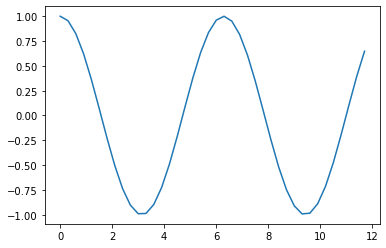

In [78]:
plt.plot(ts, scipysol[:, 1])

# 4. Doing things Smartly. Exponential of the evolution operator.

In [80]:
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function

In [82]:
expm?

In [83]:
expm(np.zeros((2,2)))

array([[1., 0.],
       [0., 1.]])

# Notice that you can write $\vec{z}(t)=e^{Mt}\vec{z}(0)$

In [84]:
def Integrate_Using_Exp(δt,m,ω):
        M=np.array([[0,1/m],[-m*(ω**2),0]]) # Evaluate the matrix
        Evolution=expm(M*δt) # Evaluate its exponential
        return Evolution # Return it.

In [85]:
z0=np.random.rand(2,1) # Initialize the phase trajectory somewhere random in the unit circle.
z0

array([[0.83071619],
       [0.19019885]])

In [87]:
U=Integrate_Using_Exp(1e-5,1,1)
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [89]:
def Evolve_Using_Numpy(U,z0,num):
    x=np.zeros(num)
    p=np.zeros(num)
    z=z0
    for i in range(num):
        x[i]=z[0]
        p[i]=z[1]
        z = U.dot(z)
        
    return(x,p)

In [90]:
Evolve_Using_Numpy(U,z0,10**5)

(array([0.83071619, 0.83071809, 0.83072   , ..., 0.60890257, 0.60889661,
        0.60889065]),
 array([ 0.19019885,  0.19019054,  0.19018223, ..., -0.59624043,
        -0.59624652, -0.59625261]))

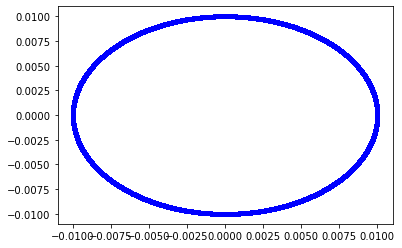

In [91]:
plt.plot(x,p,'b.')
#plt.axes().set_aspect('equal', 'datalim')

In [92]:
for i in range(6):
        %timeit Evolve_Using_Numpy(U,z0,10**i)

4.8 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17.9 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
142 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.38 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
18.2 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
207 ms ± 78.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Comparing with before, nothing good seems to have been achieved. 
# Reason for that is we are not using vectorization properly. 
# We are still going through loops.

In [35]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

587 ns ± 12 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
8.11 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
79.9 µs ± 745 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
815 µs ± 9.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.17 ms ± 43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
84.1 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
z0

array([[0.60866134],
       [0.85583444]])

In [28]:
U

array([[ 1.e+00,  1.e-05],
       [-1.e-05,  1.e+00]])

In [94]:
from numpy.linalg import matrix_power
matrix_power(U, 2).dot(z0).transpose()

array([[0.83072   , 0.19018223]])

In [95]:
def Evolve_Using_Numpy_List_Comp(U,z0,num): # I have added List_Comp for list comprehension
    Z=[(matrix_power(U, i)).dot(z0).transpose() for i in range(num)]
    return Z

In [96]:
Z=Evolve_Using_Numpy_List_Comp(U,z0,5)

In [97]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

11.6 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
135 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.32 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.7 ms ± 980 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
414 ms ± 7.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Still no speedup. So whats happening?


In [ ]:
Dim = 10


In [ ]:
δt=1e-5
F = np.random.rand(Dim,Dim) +1j*np.random.rand(Dim,Dim) 
Fd=F.conj().T
H=F.dot(Fd)
U=expm(-1j*H*δt)

In [ ]:
z0=np.random.rand(Dim)

In [ ]:
U.dot(z0)

In [ ]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

# EXERCISES: 
## Write a code to solve time dependant phase trajectory for damped SHO $\ddot{x}+\omega^2 x+\dot{x}=\epsilon\cos(\omega_d t)$

In [98]:
import numpy as np

In [99]:
z0=np.array([1,0])

In [101]:
θ=np.pi/3
M=np.array([[np.cos(θ),np.sin(θ)],[-np.sin(θ),np.cos(θ)]]) # Rotation matrix. 

In [102]:
def Repeat_Mul(M,z0,n):
    if n==0:
        return z0
    else:
        return M@Repeat_Mul(M,z0,n-1)

In [103]:
for i in range(4):
    %timeit Repeat_Mul(M,z0,10**i) # Memory issues

2.39 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
17 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
200 µs ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.71 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [105]:
def Repeat_Mul_2(M,z0,n):
    if n==1:
        return z0
    else:
        for i in range(1,n+1):
            z0 = M@z0
        return z0    

In [106]:
for i in range(5):
    %timeit Repeat_Mul_2(M,z0,10**i) # Memory issues

160 ns ± 4.88 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
14.9 µs ± 552 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
133 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.31 ms ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.2 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
Repeat_Mul_2(M,z0,136)

# Using "List Comprehension" for time dependant Hamiltonians.

In [107]:
t=np.linspace(0,10,100)
ω=np.pi/5

In [108]:
σx=np.array([[0,1],[1,0]])
σz=np.array([[1,0],[0,-1]])

In [109]:
H=[σz+np.cos(ω*t0)*σx for t0 in t]

In [111]:
H[54]

array([[ 1.        , -0.95949297],
       [-0.95949297, -1.        ]])